In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate, RandomizedSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [2]:
stardf = pd.read_csv("..//TG_stars.csv")
stardf.head (7)

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
0,9.10,3.54,1.39,0.482,16.845016,3
1,9.27,21.90,3.10,0.999,20.972221,5
2,6.61,2.81,0.63,-0.019,13.853532,1
3,8.06,7.75,0.97,0.370,17.506509,3
4,8.55,2.87,1.11,0.902,15.839409,4
5,12.31,18.80,4.99,1.336,23.680789,6
6,9.64,17.74,1.30,0.740,20.884768,4


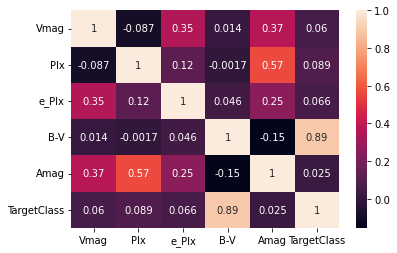

In [3]:
sns.heatmap(stardf.corr(), annot=True)
plt.show()

In [5]:
X = stardf.drop('TargetClass', axis=1)
y = stardf['TargetClass']

In [6]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.8, random_state=42)
X_test, X_valis, y_test, y_valid = train_test_split(X_test, y_test, stratify=y_test, train_size=0.5, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7741, 5), (968, 5), (7741,), (968,))

In [8]:
hidden_layer_sizes = []
for i in range(1, 11):
    size = (i,)
    hidden_layer_sizes.append(size)
hidden_layer_sizes

[(1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,)]

In [9]:
mlp_params = {
    'hidden_layer_sizes': hidden_layer_sizes,
    'activation': ['logistic', 'tanh'],
    'solver': ['adam', 'sgd'],
    'validation_fraction': [0.1, 0.2],
    'random_state': np.arange(0, 42)
}
randomized_search = RandomizedSearchCV(MLPClassifier(), param_distributions=mlp_params, n_iter=20, scoring='accuracy', cv=5, return_train_score=True)
randomized_search.fit(X_train, y_train)
best_params = randomized_search.best_params_

C:\Users\Helen\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Helen\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Helen\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Helen\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Helen\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\Helen\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Helen\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Helen\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Helen\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Helen\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\Helen\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Helen\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Helen\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Helen\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Helen\anaconda3\lib\site-packages\sklearn\neural_network\_multi

In [10]:
best_params

{'validation_fraction': 0.1,
 'solver': 'adam',
 'random_state': 1,
 'hidden_layer_sizes': (10,),
 'activation': 'tanh'}

In [11]:
clf = MLPClassifier(validation_fraction=best_params['validation_fraction'],
                    solver=best_params['solver'], random_state=best_params['random_state'],
                   hidden_layer_sizes = best_params['hidden_layer_sizes'],
                   activation=best_params['activation'])

In [12]:
cross_validate_results = cross_validate(clf, X_train, y_train, scoring='accuracy', cv=5, return_train_score=True)
cross_validate_results

C:\Users\Helen\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Helen\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Helen\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Helen\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Helen\anaconda3\lib\site-packages\sklearn\neural_network\_multi

{'fit_time': array([4.20908785, 4.45885587, 4.28201795, 4.31099248, 4.18210697]),
 'score_time': array([0.00299168, 0.00299478, 0.0021472 , 0.0029974 , 0.00199866]),
 'test_score': array([0.73143964, 0.71963824, 0.72416021, 0.72739018, 0.72157623]),
 'train_score': array([0.7249677 , 0.72662684, 0.72517358, 0.72598095, 0.72307444])}

In [13]:
train_score = cross_validate_results['train_score'].mean() * 100
test_score = cross_validate_results['test_score'].mean() * 100
print(f'Train: {train_score}')
print(f'Teste: {test_score}')

Train: 72.5164701039892
Teste: 72.48408992715147


In [14]:
clf.fit(X_train, y_train)

C:\Users\Helen\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(10,), random_state=1)

In [15]:
predict = clf.predict(X_test)
predict

array([5, 5, 5, 3, 5, 5, 2, 5, 5, 3, 3, 5, 5, 3, 3, 3, 4, 3, 3, 3, 5, 2,
       5, 3, 2, 4, 4, 3, 5, 3, 5, 4, 5, 5, 5, 2, 3, 2, 3, 4, 3, 5, 4, 5,
       2, 3, 3, 5, 4, 2, 4, 4, 4, 3, 3, 3, 4, 5, 4, 2, 5, 5, 3, 5, 4, 2,
       2, 4, 3, 4, 3, 5, 4, 6, 5, 3, 5, 5, 5, 2, 5, 5, 1, 5, 3, 3, 5, 4,
       4, 5, 4, 2, 5, 3, 2, 3, 5, 5, 5, 5, 2, 2, 5, 3, 5, 5, 3, 3, 5, 3,
       4, 3, 2, 4, 5, 5, 3, 3, 3, 2, 5, 5, 4, 1, 5, 1, 3, 5, 4, 3, 4, 3,
       3, 2, 5, 5, 2, 4, 3, 3, 2, 2, 5, 5, 4, 3, 5, 5, 3, 3, 5, 5, 5, 5,
       5, 3, 2, 3, 3, 4, 4, 6, 3, 2, 2, 3, 3, 2, 2, 2, 3, 4, 5, 5, 2, 5,
       2, 4, 5, 4, 2, 4, 3, 4, 4, 4, 3, 3, 3, 5, 5, 2, 5, 4, 4, 2, 3, 5,
       4, 5, 2, 3, 5, 3, 5, 3, 2, 5, 4, 5, 3, 3, 2, 5, 2, 5, 3, 4, 3, 5,
       3, 5, 6, 5, 3, 5, 4, 3, 6, 5, 5, 2, 2, 2, 5, 5, 3, 5, 5, 4, 3, 5,
       3, 4, 3, 2, 3, 4, 3, 5, 4, 5, 2, 3, 3, 3, 3, 5, 2, 3, 2, 5, 3, 3,
       3, 3, 4, 2, 5, 5, 3, 5, 3, 3, 5, 5, 3, 3, 1, 2, 3, 2, 5, 3, 3, 5,
       3, 2, 3, 4, 3, 6, 2, 4, 3, 4, 3, 5, 3, 3, 2,

In [16]:
print(classification_report(y_test, predict, digits=3))

              precision    recall  f1-score   support

           0      0.000     0.000     0.000         1
           1      0.588     0.179     0.274        56
           2      0.683     0.773     0.725       128
           3      0.776     0.927     0.844       246
           4      0.816     0.610     0.698       218
           5      0.734     0.908     0.812       273
           6      0.818     0.205     0.327        44
           7      0.000     0.000     0.000         2

    accuracy                          0.751       968
   macro avg      0.552     0.450     0.460       968
weighted avg      0.749     0.751     0.727       968



C:\Users\Helen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Helen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Helen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
